### Chương trình hỗ trợ minh họa 

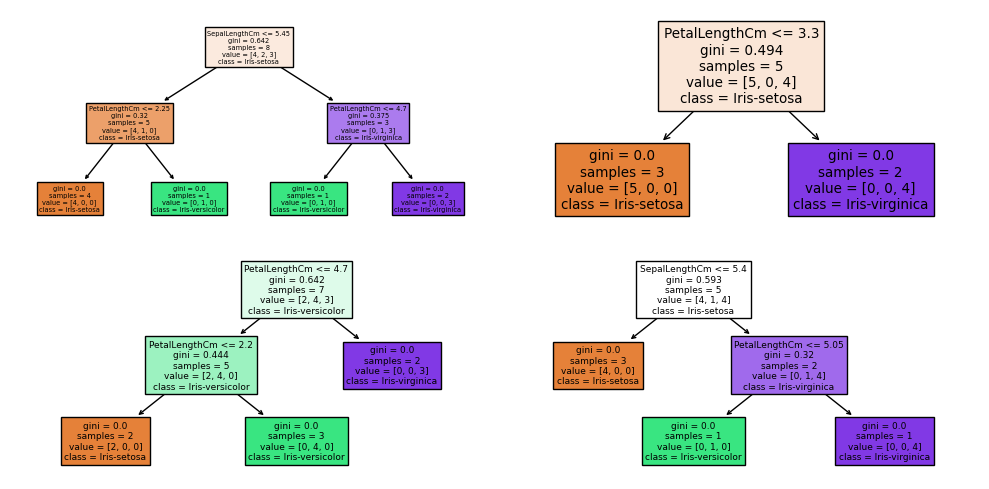

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from tabulate import tabulate

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv("C:\\Users\\DELL\\Python\\do_an_cuoi_ky\\Iris.csv")
data = data.drop("Id",axis=1)
# Chia dữ liệu thành features và nhãn
X = data.drop(["Species"], axis=1) 
label = LabelEncoder()
y = label.fit_transform(data["Species"]) 

# Khởi tạo và train Random Forest
rf_classifier = RandomForestClassifier(n_estimators=4)
rf_classifier.fit(X, y)

# Truy cập các cây con trong mô hình Random Forest
bootstrap_trees = rf_classifier.estimators_

# Hiển thị các cây con
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))  
for i, (tree, ax) in enumerate(zip(bootstrap_trees, axes.flatten())):
    ax.set_title(f"Tree {i+1}")
    _ = plot_tree(tree, feature_names=data.columns[:-1],filled=True, class_names=["Iris-setosa","Iris-versicolor", "Iris-virginica"], ax=ax) 

plt.tight_layout()
plt.show()


### Chương trình hỗ trợ minh họa Bootstrap 

In [22]:
# Số lượng mẫu và số lượng features
n_samples, n_features = X.shape
# Số lượng cây con và số lượng features được chọn ngẫu nhiên
n_estimators = 4
max_features = int(np.sqrt(n_features))  # Số lượng feature được chọn mỗi lần

# Khởi tạo một mảng để lưu trữ bootstrap samples và random feature indices
bootstrap_samples = []
random_feature_indices = []

# Tạo các bootstrap samples và random feature indices cho mỗi cây con
for _ in range(n_estimators):
    # Tạo bootstrap sample
    bootstrap_indices = np.random.choice(n_samples, n_samples, replace=True)
    bootstrap_samples.append(bootstrap_indices)
 #Tạo DataFrame để lưu trữ thông tin về bootstrap samples
bootstrap_df = pd.DataFrame(bootstrap_samples, columns=[f"Sample_{i+1}" for i in range(n_samples)])
bootstrap_df.index.name = "Tree"

# Hiển thị bảng số liệu cho bootstrap samples
print("Bootstrap Samples:")
print(tabulate(bootstrap_df, headers='keys', tablefmt='fancy_grid'))


Bootstrap Samples:
╒════════╤════════════╤════════════╤════════════╤════════════╤════════════╤════════════╤════════════╤════════════╤════════════╕
│   Tree │   Sample_1 │   Sample_2 │   Sample_3 │   Sample_4 │   Sample_5 │   Sample_6 │   Sample_7 │   Sample_8 │   Sample_9 │
╞════════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╡
│      0 │          3 │          4 │          1 │          5 │          0 │          6 │          3 │          8 │          8 │
├────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┤
│      1 │          2 │          5 │          6 │          3 │          4 │          8 │          3 │          1 │          4 │
├────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┤
│      2 │          5 │          5 │          6 │          0 │          1 │          